# Data Exploration

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data into pandas dataframe
conversion_df = pd.read_csv('../data/0_raw/Conversion_data.csv')
conversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   `SITE              100000 non-null  object 
 1   AD_FORMAT          100000 non-null  object 
 2   BROWSER_NAME       99968 non-null   object 
 3   SUPPLY_VENDOR      100000 non-null  object 
 4   METRO              97611 non-null   float64
 5   OS_FAMILY_NAME     99990 non-null   object 
 6   USER_HOUR_OF_WEEK  99987 non-null   float64
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


In [25]:
nonconversion_df = pd.read_csv('../data/0_raw/nonconversion_data.csv')
nonconversion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SITE               300000 non-null  object 
 1   AD_FORMAT          300000 non-null  object 
 2   BROWSER_NAME       299827 non-null  object 
 3   SUPPLY_VENDOR      300000 non-null  object 
 4   METRO              278670 non-null  float64
 5   OS_FAMILY_NAME     299956 non-null  object 
 6   USER_HOUR_OF_WEEK  299966 non-null  float64
dtypes: float64(2), object(5)
memory usage: 16.0+ MB


In [27]:
conversion_df.head()

,`SITE,AD_FORMAT,BROWSER_NAME,SUPPLY_VENDOR,METRO,OS_FAMILY_NAME,USER_HOUR_OF_WEEK
0,www.auctionzip.com,728x90,Chrome,google,619.0,Windows,63.0
1,www.coolmathgames.com,160x600,Chrome,pubmatic,544.0,OS X,155.0
2,www.equibase.com,9544x9544,Chrome,sharethrough,617.0,Windows,155.0
3,www.manua.ls,320x50,Chrome,Media.Net,501.0,Android,92.0
4,www.wunderground.com,640x360,Chrome,yieldmo,613.0,Windows,91.0


In [28]:
nonconversion_df.head()

,SITE,AD_FORMAT,BROWSER_NAME,SUPPLY_VENDOR,METRO,OS_FAMILY_NAME,USER_HOUR_OF_WEEK
0,www.the-sun.com,640x360,Chrome,yieldmo,652.0,Windows,63.0
1,com.pixel.art.coloring.color.number,320x50,WebView,google,597.0,Android,64.0
2,www.yahoo.com,640x360,Chrome,yieldmo,563.0,Windows,64.0
3,www.fox61.com,9544x9544,Chrome,taboola,623.0,Windows,63.0
4,news.yahoo.com,300x250,Chrome,pubmatic,618.0,Windows,63.0


The conversion and nonconversion data are of the same format (except the `SITE vs SITE column name difference). The conversion dataframe has 100K rows wheresas the nonconversion dataframe has 300K rows. Both dataframes have fields with null values.
There are two numeric-valued columns and the rest are categorical.

In [30]:
# Let's combine the conversion with nonconversion data in one data frame for convinience of exploration.

# Make columns' names the same
conversion_df.columns = nonconversion_df.columns

all_data = pd.concat([conversion_df, nonconversion_df]).reset_index()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              400000 non-null  int64  
 1   SITE               400000 non-null  object 
 2   AD_FORMAT          400000 non-null  object 
 3   BROWSER_NAME       399795 non-null  object 
 4   SUPPLY_VENDOR      400000 non-null  object 
 5   METRO              376281 non-null  float64
 6   OS_FAMILY_NAME     399946 non-null  object 
 7   USER_HOUR_OF_WEEK  399953 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 24.4+ MB


In [31]:
all_data[:4]

,index,SITE,AD_FORMAT,BROWSER_NAME,SUPPLY_VENDOR,METRO,OS_FAMILY_NAME,USER_HOUR_OF_WEEK
0,0,www.auctionzip.com,728x90,Chrome,google,619.0,Windows,63.0
1,1,www.coolmathgames.com,160x600,Chrome,pubmatic,544.0,OS X,155.0
2,2,www.equibase.com,9544x9544,Chrome,sharethrough,617.0,Windows,155.0
3,3,www.manua.ls,320x50,Chrome,Media.Net,501.0,Android,92.0


In [ ]:
# Check the distributions again

# Select the numeric columns for pair plot
numeric_data = all_data[['METRO', 'USER_HOUR_OF_WEEK']]

# Create pair plot
sns.pairplot(numeric_data)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

In [38]:
# Check the descriptive statistics for numerical columns, METRO and USER_HOUR_OF_WEEK
print('Kurtosis ', all_data['METRO'].kurt())
all_data['METRO'].describe()

Kurtosis  9068.690564297383


count    376281.000000
mean        657.234984
std        4235.286957
min           0.000000
25%         526.000000
50%         602.000000
75%         669.000000
max      554053.000000
Name: METRO, dtype: float64

A Kurtosis of 9069 for METRO values indicates that the distribution has heavy tails and a sharp peak with  extreme outliers. The standard deviation is extraordinarily large compared to the mean: 4235 vs. 657. The interquantile range is narrow comared to the data range: 669−526=143 vs. 554053. All these reinforce the presence of extreme outliers. 

In [34]:
print('Kurtosis ', all_data['USER_HOUR_OF_WEEK'].kurt())
all_data['USER_HOUR_OF_WEEK'].describe()

Kurtosis  -0.863700936149915


count    399953.000000
mean         87.539098
std          43.836813
min           0.000000
25%          62.000000
50%          77.000000
75%         122.000000
max         167.000000
Name: USER_HOUR_OF_WEEK, dtype: float64

A Kurtosis of -0.9 indicates that the USER_HOUR_OF_WEEK data has lighter tails and flatter peak compared to a normal distribution. The standard deviation is smaller than mean indicating a reasonable variability. Mean is less than 10% larger than median indicates a light skewedness. The data range is 167 whereas the interquantile range is only 122−62=60. This suggests that 50% of the data falls within a moderately wide range of 60 units, indicating fairly spread-out data.

### Check correlation between numerical featuers

### Check values distribution in low-cardinality features

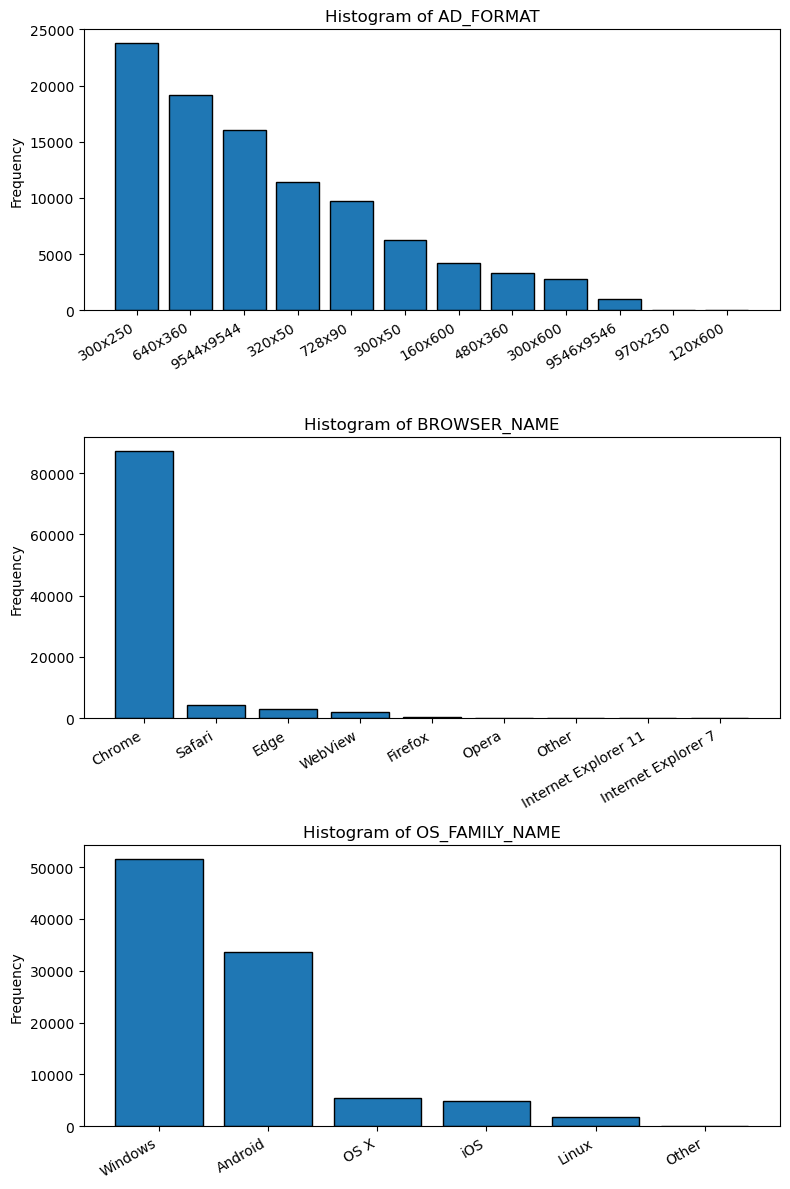

In [19]:
# Create histograms for categorical columns
categorical_columns = data.drop(columns=['`SITE', 'SUPPLY_VENDOR']).select_dtypes(include=['object']).columns

# Plot histograms for categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, len(categorical_columns) * 4))

for i, col in enumerate(categorical_columns):
    value_counts = data[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values, edgecolor="black")
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xticks(range(len(value_counts.index)))
    axes[i].set_xticklabels(value_counts.index, rotation=30, ha='right')
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### Check value counts in high-cardinality features, SITE and SUPPLY_VENDOR

In [20]:
data['`SITE'].value_counts()

`SITE
www.yahoo.com                11995
mail.yahoo.com                8246
www.ebay.com                  3278
www.msn.com                   2868
www.foxnews.com               2110
                             ...  
www.setlist.fm                   1
astro.cafeastrology.com          1
fategrandorder.fandom.com        1
www.nieniedialogues.com          1
domesticdreamboat.com            1
Name: count, Length: 10137, dtype: int64

In [51]:
data['SUPPLY_VENDOR'].value_counts()

SUPPLY_VENDOR
google                  10975
pubmatic                 9965
yieldmo                  9370
triplelift               9341
taboola                  7877
                        ...  
primis                      1
Bustle Digital Group        1
lkqd                        1
G-O Media                   1
accuweather                 1
Name: count, Length: 73, dtype: int64

In [16]:
data['METRO'].value_counts()

METRO
623.0      4714
539.0      4088
618.0      4029
534.0      3560
753.0      3279
           ... 
798.0         5
804.0         4
868.0         1
76009.0       1
76049.0       1
Name: count, Length: 213, dtype: int64

In [20]:
data['USER_HOUR_OF_WEEK'].value_counts()

USER_HOUR_OF_WEEK
111.0    1723
110.0    1675
109.0    1566
63.0     1548
62.0     1526
         ... 
50.0      107
146.0     105
147.0      99
75.0       91
51.0       87
Name: count, Length: 168, dtype: int64

### Check correlation between categorical features using Cramer's V statistic

In [61]:
# Create histograms for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Calculate Cramér's V for all pairs of categorical columns using scipy
cramers_v_results = {}
n = len(categorical_columns)
for i in range(n-1):
    for j in range(i+1,n):
        value = cramers_v(data[categorical_columns[i]], data[categorical_columns[j]])
        cramers_v_results[f"{categorical_columns[i]} vs {categorical_columns[j]}"] = value

# Convert results to a DataFrame for readability
cramers_v_df = (
    pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=["Cramer's V"])
    .sort_values(by="Cramer's V", ascending=False)
)
cramers_v_df

,Cramer's V
`SITE vs SUPPLY_VENDOR,0.521115
`SITE vs OS_FAMILY_NAME,0.450790
`SITE vs AD_FORMAT,0.449211
`SITE vs BROWSER_NAME,0.395987
BROWSER_NAME vs OS_FAMILY_NAME,0.373256
AD_FORMAT vs SUPPLY_VENDOR,0.256084
AD_FORMAT vs OS_FAMILY_NAME,0.234652
SUPPLY_VENDOR vs OS_FAMILY_NAME,0.129349
BROWSER_NAME vs SUPPLY_VENDOR,0.098206
AD_FORMAT vs BROWSER_NAME,0.064352


#### Cramér's V sitatistic nterpretation:
    0.00 - 0.10: Weak or no association.
    0.11 - 0.30: Moderate association.
    0.31 - 0.50: Strong association.
    > 0.50: Very strong association.

# Data Cleaning

The data has rows with empty values and outliers. Let's get rid of them before we continue our exploration.

In [21]:
# We have a couple of crazy ourliers in METRO values. Let's get rid of them

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to the numeric columns
for column in ['METRO']:
    data = remove_outliers(conversion_df.dropna(), column)

# Confirm the updated dataset's shape
data.shape

(96412, 7)

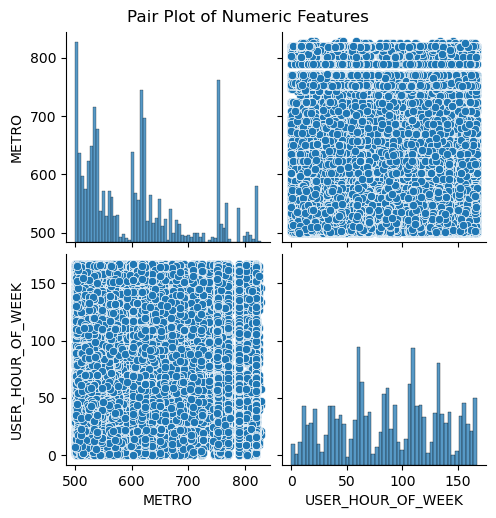

In [22]:
# Check the distributions again

# Select the numeric columns for pair plot
numeric_data = data[['METRO', 'USER_HOUR_OF_WEEK']]

# Create pair plot
sns.pairplot(numeric_data)
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

In [25]:
data.columns

Index(['`SITE', 'AD_FORMAT', 'BROWSER_NAME', 'SUPPLY_VENDOR', 'METRO',
       'OS_FAMILY_NAME', 'USER_HOUR_OF_WEEK'],
      dtype='object')

In [53]:
# Create a contingency table for two selected categorical columns
# Selecting two columns with significant categorical data
pd.crosstab(data['BROWSER_NAME'], data['OS_FAMILY_NAME'])

OS_FAMILY_NAME,Android,Linux,OS X,Other,Windows,iOS
BROWSER_NAME,,,,,,
Chrome,32502,1811,3967,54,47460,491
Edge,3,0,6,2,2993,3
Firefox,15,3,45,0,448,8
Internet Explorer 11,0,0,0,0,5,0
Internet Explorer 7,0,0,0,0,2,0
Opera,2,0,5,0,143,0
Other,9,2,25,2,38,3
Safari,0,0,1242,15,0,2998
WebView,766,0,3,36,3,1302


In [56]:
pd.crosstab(data['BROWSER_NAME'], data['`SITE'])

`SITE,020c7e984e883da442024b2f2b0df9bf.safeframe.googlesyndication.com,0xzx.com,1.megadiscografiascompletas.xyz,1000waystodie.fandom.com,100krecipes.com,100noticias.com.ni,1035kissfmboise.com,103gbfrocks.com,1043wowcountry.com,10fastfingers.com,...,zinmanga.com,zip.postcodebase.com,zkillboard.com,zohark.com,zombsroyale.io,zone.msn.com,zonecoverage.com,zooawesome.com,zy2.farm2.zynga.com,zynga.com
BROWSER_NAME,,,,,,,,,,,,,,,,,,,,,
Chrome,1,1,1,1,6,1,1,2,1,2,...,3,1,8,1,2,67,3,1,10,13
Edge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
Firefox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Internet Explorer 11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Internet Explorer 7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Opera,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Other,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Safari,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WebView,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
